In [1]:
#pip install tf_keras #To avoid keras layers issue during transfer learning

In [2]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt

2024-05-01 12:48:28.979391: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-01 12:48:28.979491: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-01 12:48:29.100395: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
print(tf.__version__)

2.15.0


In [4]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/kaggle/input/sentiment-images-classifier/6 Emotions for image classification"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 6 directories and 0 images in '/kaggle/input/sentiment-images-classifier/6 Emotions for image classification'
There are 0 directories and 163 images in '/kaggle/input/sentiment-images-classifier/6 Emotions for image classification/fear'
There are 0 directories and 224 images in '/kaggle/input/sentiment-images-classifier/6 Emotions for image classification/sad'
There are 0 directories and 168 images in '/kaggle/input/sentiment-images-classifier/6 Emotions for image classification/pain'
There are 0 directories and 201 images in '/kaggle/input/sentiment-images-classifier/6 Emotions for image classification/disgust'
There are 0 directories and 230 images in '/kaggle/input/sentiment-images-classifier/6 Emotions for image classification/happy'
There are 0 directories and 214 images in '/kaggle/input/sentiment-images-classifier/6 Emotions for image classification/anger'


In [181]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/kaggle/working/train") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['anger' 'disgust' 'fear' 'happy' 'pain' 'sad']


In [6]:
# View an image
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.figure()
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image
  return img

Image shape: (229, 370, 3)
Image shape: (514, 770, 3)
Image shape: (683, 1024, 3)
Image shape: (612, 459, 3)
Image shape: (408, 612, 3)
Image shape: (407, 612, 3)


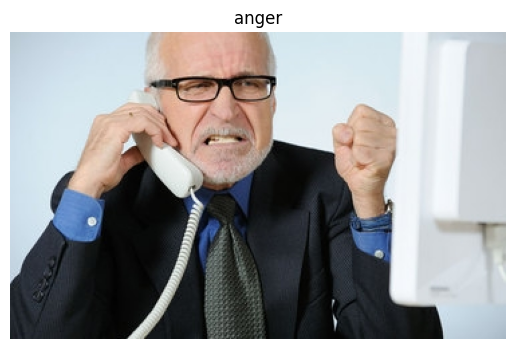

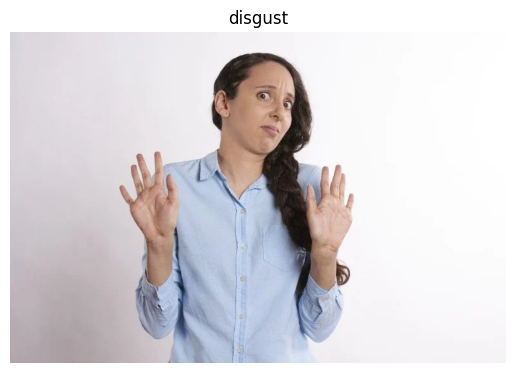

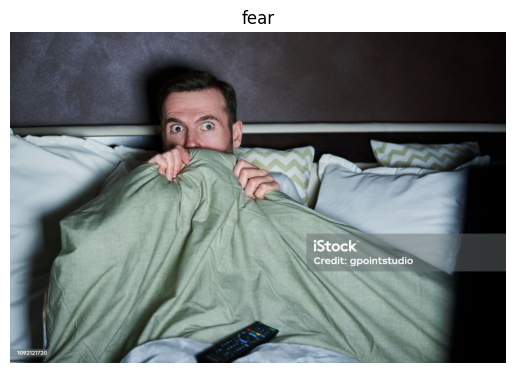

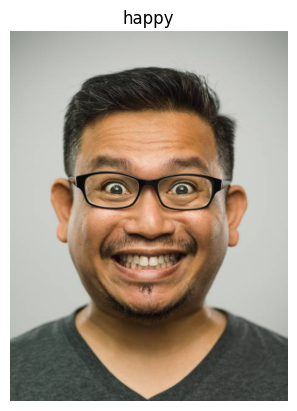

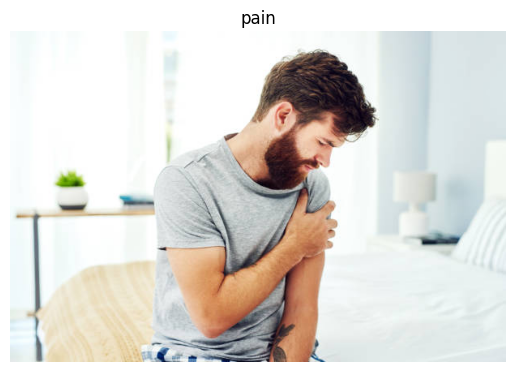

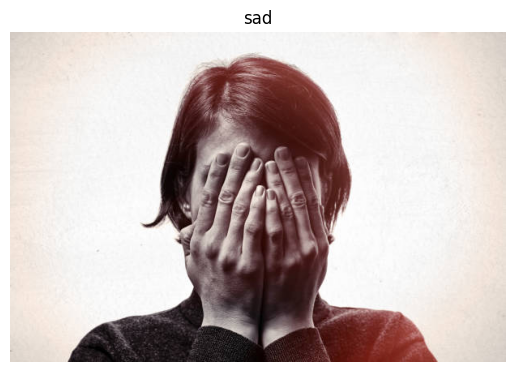

In [7]:
#View a random image from the training dataset
for item in class_names:
    img = view_random_image(target_dir="/kaggle/input/sentiment-images-classifier/6 Emotions for image classification/",target_class=item)

In [8]:
import shutil
from random import shuffle
from math import ceil

def split_data_and_copy(source_dir,target_dir,percent_of_train_data):
    os.makedirs(target_dir, exist_ok=True)
        
    train_dir = os.path.join(target_dir,'train')
    test_dir = os.path.join(target_dir,'test')

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    for subdir, dirs, files in os.walk(source_dir):
        if subdir == source_dir:
            continue
        subdir_name = os.path.basename(subdir)
        train_subdir = os.path.join(train_dir,subdir_name)
        test_subdir = os.path.join(test_dir,subdir_name)

        print(f"- Working on {train_subdir} and {test_subdir}")
        os.makedirs(train_subdir, exist_ok=True)
        os.makedirs(test_subdir, exist_ok=True)

        shuffle(files)
        split_point = ceil(percent_of_train_data * len(files) / 100)

        train_files = files[:split_point]
        test_files = files[split_point:]

        for file in train_files:
            shutil.copy(os.path.join(subdir,file),train_subdir)

        for file in test_files:
            shutil.copy(os.path.join(subdir,file),test_subdir)
            

    print("Images copied successfully.")

In [9]:
split_data_and_copy("/kaggle/input/sentiment-images-classifier/6 Emotions for image classification","/kaggle/working/",80)

- Working on /kaggle/working/train/fear and /kaggle/working/test/fear
- Working on /kaggle/working/train/sad and /kaggle/working/test/sad
- Working on /kaggle/working/train/pain and /kaggle/working/test/pain
- Working on /kaggle/working/train/disgust and /kaggle/working/test/disgust
- Working on /kaggle/working/train/happy and /kaggle/working/test/happy
- Working on /kaggle/working/train/anger and /kaggle/working/test/anger
Images copied successfully.


In [337]:
#To remove all directories and images, in case for clean up purposes
# shutil.rmtree("/kaggle/working/test")
# shutil.rmtree("/kaggle/working/train")


In [226]:
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/kaggle/working/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 3 directories and 1 images in '/kaggle/working/'
There are 0 directories and 0 images in '/kaggle/working/.virtual_documents'
There are 6 directories and 0 images in '/kaggle/working/train'
There are 0 directories and 107 images in '/kaggle/working/train/disgust'
There are 0 directories and 128 images in '/kaggle/working/train/pain'
There are 0 directories and 165 images in '/kaggle/working/train/anger'
There are 0 directories and 180 images in '/kaggle/working/train/sad'
There are 0 directories and 180 images in '/kaggle/working/train/happy'
There are 0 directories and 122 images in '/kaggle/working/train/fear'
There are 6 directories and 0 images in '/kaggle/working/test'
There are 0 directories and 23 images in '/kaggle/working/test/disgust'
There are 0 directories and 32 images in '/kaggle/working/test/pain'
There are 0 directories and 40 images in '/kaggle/working/test/anger'
There are 0 directories and 44 images in '/kaggle/working/test/sad'
There are 0 directories and 

In [111]:
def remove_incompatible_images(path):
    num_skipped=0
    for folder_name in class_names:
        folder_path = os.path.join(path, folder_name)
        for fname in os.listdir(folder_path):
            fpath = os.path.join(folder_path, fname)
            try:
                fobj = open(fpath, "rb")
                is_jfif = b"JFIF" in fobj.peek(10)
            finally:
                fobj.close()

            if not is_jfif:
                num_skipped += 1
                # Delete corrupted image
                print(f"Removing {fpath}")
                os.remove(fpath)

    print(f"Deleted {num_skipped} images.")
    
    

In [112]:
# While training there were errors from tensorflow for incompatible image. So cleaning up 
remove_incompatible_images("/kaggle/working/train")

Removing /kaggle/working/train/anger/Screenshot-2019-11-08-at-11.42.49.png
Removing /kaggle/working/train/anger/portrait-angry-bald-man-aggressive-260nw-1366656503.jpeg
Removing /kaggle/working/train/anger/shocked-senior-man-holding-his-260nw-629995508.jpeg
Removing /kaggle/working/train/anger/hitting-featured.jpg
Removing /kaggle/working/train/anger/iStock_000040016530_Large.jpg
Removing /kaggle/working/train/anger/Virtual-Workplace-2.jpg
Removing /kaggle/working/train/anger/shutterstock_133731200.jpg
Removing /kaggle/working/train/disgust/ng-casual-clothes-and-glasses-disgusted-expression-displeased-and-2142739549.jpeg
Removing /kaggle/working/train/disgust/depositphotos_255961840-stock-photo-beautiful-young-african-american-woman.jpeg
Removing /kaggle/working/train/disgust/girl-cringe-as-seeing-something-embarrassing-bothering-woman-make-uncomfortable-smile-squinting-feeling-worried-displeased-see-bothering-bad-situation-standing-white-background_176420-36911.webp
Removing /kaggle/w

In [113]:
remove_incompatible_images("/kaggle/working/test")

Removing /kaggle/working/test/anger/road-rage-enraged-young-woman-260nw-1724744341.jpg
Removing /kaggle/working/test/anger/iStock_1054346638.jpg
Removing /kaggle/working/test/disgust/n-in-white-shirt-demonstrates-disgust-twisting-face-with-negative-2034791339.jpg
Removing /kaggle/working/test/disgust/depositphotos_599731792-stock-photo-young-beautiful-woman-standing-casual.jpg
Removing /kaggle/working/test/disgust/nding-over-yellow-background-wearing-glasses-disgusted-expression-2288644083.jpg
Removing /kaggle/working/test/disgust/young-beautiful-brunette-woman-wearing-260nw-1790705198.jpg
Removing /kaggle/working/test/disgust/over-blue-isolated-background-disgusted-expression-displeased-and-2169918131.jpg
Removing /kaggle/working/test/disgust/no-confused-young-asian-woman-260nw-1453531436.webp
Removing /kaggle/working/test/disgust/sad-young-woman-standing-isolated-white-wall_171337-18045.webp
Removing /kaggle/working/test/disgust/close-up-sad-brunette-girl-sulking-looking-upset_1258-3

In [114]:

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetV2B0
], name ="data_augmentation")


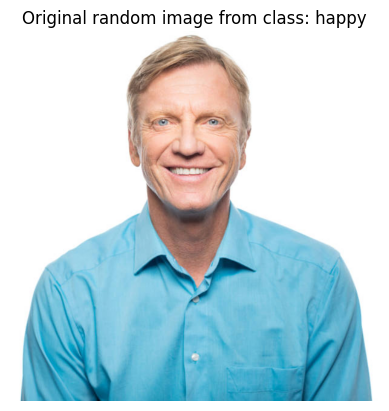

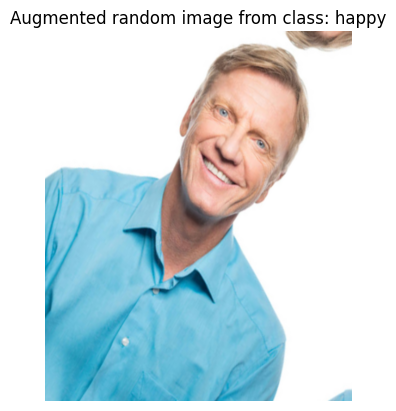

In [318]:
target_class = random.choice(class_names) # choose a random class
target_dir = "/kaggle/working/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [116]:
IMG_SIZE = (224, 224) # define image size
train_dir = "/kaggle/working/train"
test_dir = "/kaggle/working/test"

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", 
                                                                            batch_size=32) 
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical",
                                                                           batch_size=32)
     

Found 880 files belonging to 6 classes.
Found 216 files belonging to 6 classes.


In [208]:
train_data.class_names

['anger', 'disgust', 'fear', 'happy', 'pain', 'sad']

In [164]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = tf.keras.layers.Dense(6, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_1 = tf.keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                    epochs=20,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)) # validate for less steps
                    )
     

Epoch 1/20
28/28 [==============================] - 17s 332ms/step - loss: 1.6907 - accuracy: 0.2773 - val_loss: 1.4610 - val_accuracy: 0.4062
Epoch 2/20
28/28 [==============================] - 7s 244ms/step - loss: 1.4462 - accuracy: 0.4534 - val_loss: 1.1848 - val_accuracy: 0.6562
Epoch 3/20
28/28 [==============================] - 7s 222ms/step - loss: 1.3352 - accuracy: 0.5091 - val_loss: 1.3262 - val_accuracy: 0.4375
Epoch 4/20
28/28 [==============================] - 8s 255ms/step - loss: 1.2782 - accuracy: 0.5170 - val_loss: 1.2263 - val_accuracy: 0.5938
Epoch 5/20
28/28 [==============================] - 8s 258ms/step - loss: 1.2101 - accuracy: 0.5568 - val_loss: 0.8725 - val_accuracy: 0.7500
Epoch 6/20
28/28 [==============================] - 7s 237ms/step - loss: 1.1682 - accuracy: 0.5739 - val_loss: 1.4392 - val_accuracy: 0.4688
Epoch 7/20
28/28 [==============================] - 7s 226ms/step - loss: 1.1432 - accuracy: 0.5898 - val_loss: 1.0677 - val_accuracy: 0.5312
Epoch

In [165]:
model_1.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 6)                 768

In [166]:
model_1.fit(test_data)

7/7 [==============================] - 3s 357ms/step - loss: 1.1785 - accuracy: 0.5417


<Axes: >

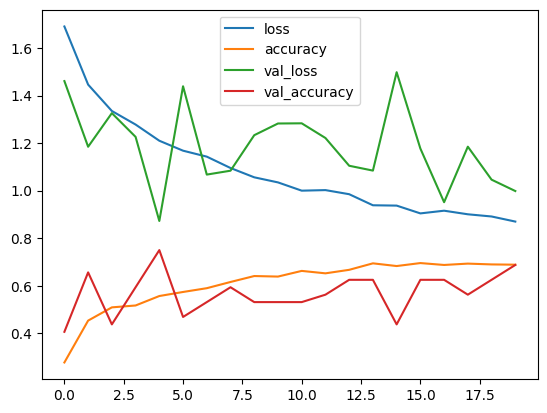

In [167]:
pd.DataFrame(history_1.history).plot()

# Transfer learning using EfficientNet with unfreezing top 10 layers

In [157]:
#model_2=tf.keras.models.clone_model(model_1)

In [225]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model_2 = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model_2.trainable = True

for layer in base_model_2.layers[:-10]:
    layer.trainable = False

inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model_2(x, training=False)

# Pool output features of base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
x = tf.keras.layers.Dense(64, activation="relu", name="custom_layer")(x)

# Put a dense layer on as the output
outputs = tf.keras.layers.Dense(6, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_2 = tf.keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                    epochs=20,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)) # validate for less steps
                    )
     

Epoch 1/20
28/28 [==============================] - 16s 238ms/step - loss: 1.5706 - accuracy: 0.3489 - val_loss: 1.2176 - val_accuracy: 0.5938
Epoch 2/20
28/28 [==============================] - 6s 208ms/step - loss: 1.1151 - accuracy: 0.5830 - val_loss: 1.3617 - val_accuracy: 0.4375
Epoch 3/20
28/28 [==============================] - 6s 187ms/step - loss: 0.9762 - accuracy: 0.6352 - val_loss: 1.3844 - val_accuracy: 0.5000
Epoch 4/20
28/28 [==============================] - 6s 199ms/step - loss: 0.8568 - accuracy: 0.6807 - val_loss: 1.0856 - val_accuracy: 0.6250
Epoch 5/20
28/28 [==============================] - 5s 173ms/step - loss: 0.6964 - accuracy: 0.7659 - val_loss: 0.7722 - val_accuracy: 0.7188
Epoch 6/20
28/28 [==============================] - 5s 172ms/step - loss: 0.6328 - accuracy: 0.7841 - val_loss: 1.4292 - val_accuracy: 0.5000
Epoch 7/20
28/28 [==============================] - 6s 192ms/step - loss: 0.5336 - accuracy: 0.8080 - val_loss: 1.0419 - val_accuracy: 0.7188
Epoch

In [210]:
model_2.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 6)                 768

In [211]:
model_2.layers

In [351]:
for layer in model_2.layers[2].layers[-15:]:
    print(f"Layer : {layer} and Trainable {layer.trainable}")

Layer : <keras.src.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7ef5057d7e20> and Trainable False
Layer : <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7ef5057d6710> and Trainable False
Layer : <keras.src.layers.core.activation.Activation object at 0x7ef5057ecc10> and Trainable False
Layer : <keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7ef5057d7550> and Trainable False
Layer : <keras.src.layers.reshaping.reshape.Reshape object at 0x7ef5057ed240> and Trainable False
Layer : <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7ef505791a80> and Trainable True
Layer : <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7ef5057b8bb0> and Trainable True
Layer : <keras.src.layers.merging.multiply.Multiply object at 0x7ef5057ef6a0> and Trainable True
Layer : <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7ef5057efb20> and Trainable True
Layer : <keras.src.layers.normalizati

In [281]:
model_2.evaluate(test_data)

7/7 [==============================] - 1s 35ms/step - loss: 1.6924 - accuracy: 0.6296


[1.6924238204956055, 0.6296296119689941]

<Axes: >

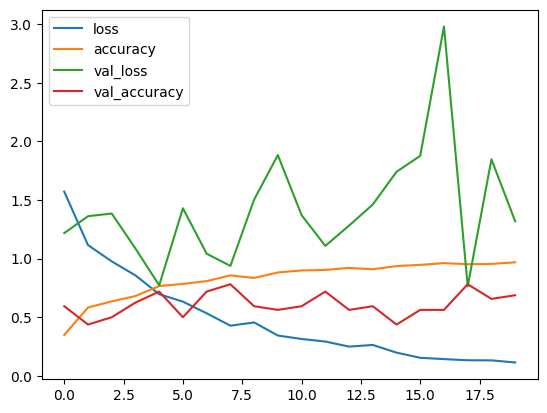

In [282]:
pd.DataFrame(history_2.history).plot()

# Prediction with real world image

--2024-05-01 15:24:02--  https://t4.ftcdn.net/jpg/01/22/33/55/360_F_122335513_GB4jSOLOix2BTYODKet4qWJH7AEaEszL.jpg
Resolving t4.ftcdn.net (t4.ftcdn.net)... 151.101.1.167, 151.101.65.167, 151.101.129.167, ...
Connecting to t4.ftcdn.net (t4.ftcdn.net)|151.101.1.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29659 (29K) [image/jpeg]
Saving to: 'happy_img.jpg'

happy_img.jpg       100%[===================>]  28.96K  --.-KB/s    in 0.004s  

2024-05-01 15:24:02 (6.44 MB/s) - 'happy_img.jpg' saved [29659/29659]



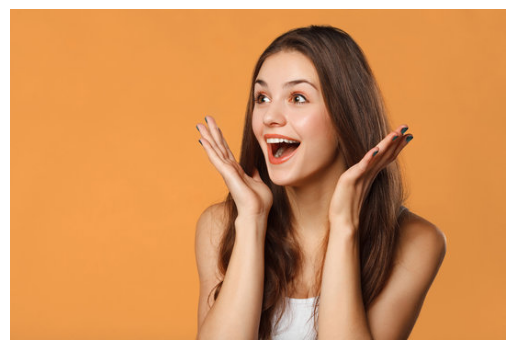

In [319]:
# View our example image
!wget -O happy_img.jpg https://t4.ftcdn.net/jpg/01/22/33/55/360_F_122335513_GB4jSOLOix2BTYODKet4qWJH7AEaEszL.jpg
steak = mpimg.imread("happy_img.jpg")
plt.imshow(steak)
plt.axis(False);

--2024-05-01 15:34:36--  https://kentuckycounselingcenter.com/wp-content/uploads/2020/11/Guy-in-a-brown-suit-yelling-at-the-phone-by-Moose-Photos-scaled.jpg
Resolving kentuckycounselingcenter.com (kentuckycounselingcenter.com)... 192.0.78.252, 192.0.78.182
Connecting to kentuckycounselingcenter.com (kentuckycounselingcenter.com)|192.0.78.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 185725 (181K) [image/jpeg]
Saving to: 'anger.jpg'

anger.jpg           100%[===================>] 181.37K  --.-KB/s    in 0.05s   

2024-05-01 15:34:36 (3.75 MB/s) - 'anger.jpg' saved [185725/185725]



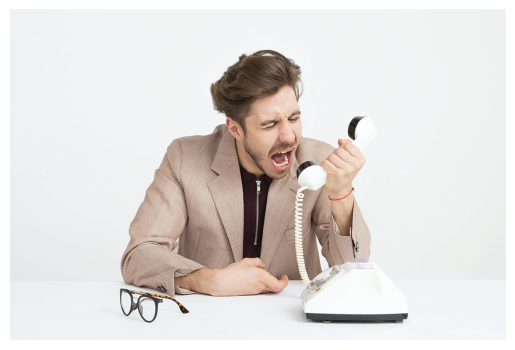

In [352]:
# View our example image
!wget -O anger.jpg https://kentuckycounselingcenter.com/wp-content/uploads/2020/11/Guy-in-a-brown-suit-yelling-at-the-phone-by-Moose-Photos-scaled.jpg
steak = mpimg.imread("anger.jpg")
plt.imshow(steak)
plt.axis(False);

--2024-05-01 15:48:13--  https://images.newscientist.com/wp-content/uploads/2016/11/02180000/gettyimages-119547046.jpg
Resolving images.newscientist.com (images.newscientist.com)... 151.101.2.217, 151.101.66.217, 151.101.130.217, ...
Connecting to images.newscientist.com (images.newscientist.com)|151.101.2.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81304 (79K) [image/jpeg]
Saving to: 'disgust.jpg'

disgust.jpg         100%[===================>]  79.40K  --.-KB/s    in 0.03s   

2024-05-01 15:48:13 (3.01 MB/s) - 'disgust.jpg' saved [81304/81304]



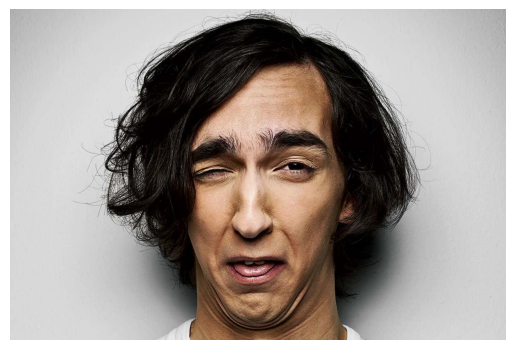

In [363]:
!wget -O disgust.jpg https://images.newscientist.com/wp-content/uploads/2016/11/02180000/gettyimages-119547046.jpg
steak = mpimg.imread("disgust.jpg")
plt.imshow(steak)
plt.axis(False);

--2024-05-01 15:48:16--  https://img.freepik.com/free-photo/portrait-young-afro-american-man-with-scared-anxious-expression-bites-finger-nails-wears-green-sweater_273609-8507.jpg
Resolving img.freepik.com (img.freepik.com)... 104.116.243.184, 104.116.243.75, 2600:1417:e800::b81a:7f98, ...
Connecting to img.freepik.com (img.freepik.com)|104.116.243.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44347 (43K) [image/jpeg]
Saving to: 'fear.jpg'

fear.jpg            100%[===================>]  43.31K  --.-KB/s    in 0.004s  

2024-05-01 15:48:16 (11.5 MB/s) - 'fear.jpg' saved [44347/44347]



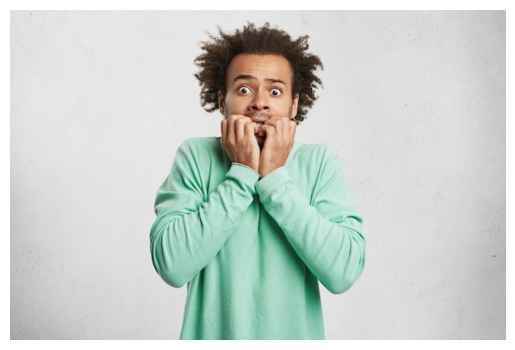

In [364]:
!wget -O fear.jpg https://img.freepik.com/free-photo/portrait-young-afro-american-man-with-scared-anxious-expression-bites-finger-nails-wears-green-sweater_273609-8507.jpg
steak = mpimg.imread("fear.jpg")
plt.imshow(steak)
plt.axis(False);

In [365]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  #img = img/255. ############################################# Very important -> This is not needed, because it is handled by the EfficientNetV2B0 layer
  return img

In [366]:
def make_predictions(model,image,class_names):
    
    processed_img = load_and_prep_image(image)
    image_convert_dim = tf.expand_dims(processed_img, axis=0) # add an extra dimension at axis 0
    prediction = model.predict(image_convert_dim)
    output=train_data.class_names[np.argmax(prediction)]
    
    print(f"He/She seems to be {output}")

In [367]:
make_predictions(model_2,"happy_img.jpg",train_data.class_names)

1/1 [==============================] - 0s 29ms/step
He/She seems to be happy


In [368]:
make_predictions(model_2,"anger.jpg",train_data.class_names)

1/1 [==============================] - 0s 26ms/step
He/She seems to be anger


In [371]:
make_predictions(model_2,"disgust.jpg",train_data.class_names) # Predicted wrongly

1/1 [==============================] - 0s 26ms/step
He/She seems to be sad


In [372]:
make_predictions(model_2,"fear.jpg",train_data.class_names)

1/1 [==============================] - 0s 25ms/step
He/She seems to be fear
